In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output


from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

In [ ]:
train = pd.read_csv("/content/train_data.csv")
test = pd.read_csv("/content/test_data.csv")

In [ ]:
train.head()

,name,brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
test.head()

,name,brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [ ]:
train.count()

,0
name,4000
brand,4000
categories,4000
primaryCategories,4000
reviews_date,4000
reviews_text,4000
reviews_title,3990
sentiment,4000


In [ ]:
test.count()

,0
name,1000
brand,1000
categories,1000
primaryCategories,1000
reviews_date,1000
reviews_text,1000
reviews_title,997


In [ ]:
train.duplicated().sum()


58

In [ ]:
train = train.drop_duplicates().reset_index(drop=True)


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews_date       3942 non-null   object
 5   reviews_text       3942 non-null   object
 6   reviews_title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 246.5+ KB


In [ ]:
train.dtypes


,0
name,object
brand,object
categories,object
primaryCategories,object
reviews_date,object
reviews_text,object
reviews_title,object
sentiment,object


In [ ]:
train.describe()


,name,brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment
count,3942,3942,3942,3942,3942,3942,3932,3942
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,3942,628,2562,98,4,99,3694


<Axes: xlabel='count', ylabel='sentiment'>

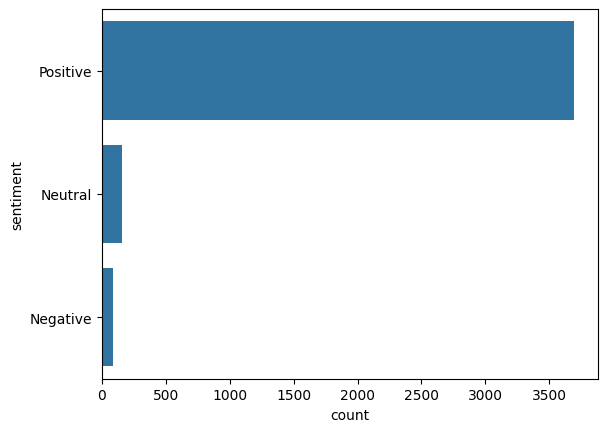

In [ ]:

sns.countplot(y=train.sentiment)


<Axes: xlabel='count', ylabel='sentiment'>

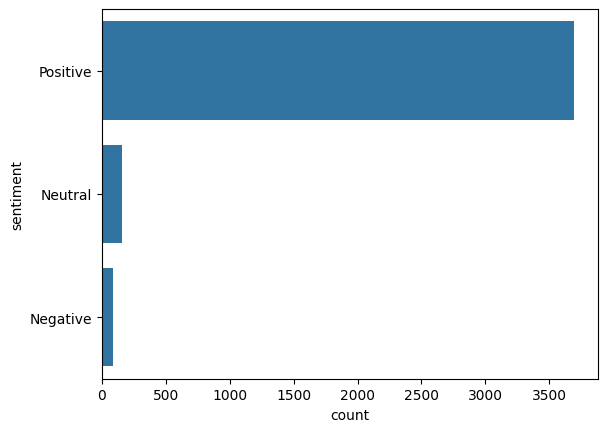

In [ ]:
sns.countplot( train['sentiment'])


In [ ]:
train.sentiment.value_counts()


,count
sentiment,
Positive,3694
Neutral,158
Negative,90


In [ ]:
train.isnull().sum()


,0
name,0
brand,0
categories,0
primaryCategories,0
reviews_date,0
reviews_text,0
reviews_title,10
sentiment,0


In [ ]:
test.isnull().sum()


,0
name,0
brand,0
categories,0
primaryCategories,0
reviews_date,0
reviews_text,0
reviews_title,3


In [ ]:
train.columns


Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews_date',
       'reviews_text', 'reviews_title', 'sentiment'],
      dtype='object')

In [ ]:
train.rename(columns = {'reviews.text':'reviews_text', 'reviews.title':'reviews_title','reviews.date':'reviews_date'}, inplace = True)


In [ ]:
train.columns


Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews_date',
       'reviews_text', 'reviews_title', 'sentiment'],
      dtype='object')

<Axes: ylabel='count'>

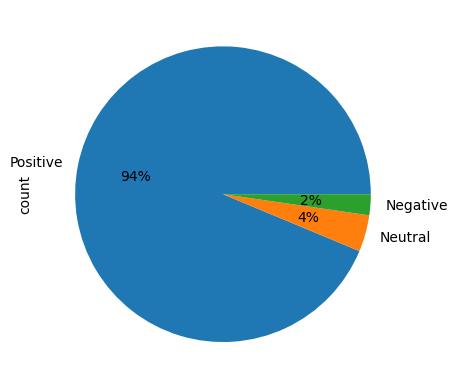

In [ ]:
train['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')


In [ ]:
train = train[train.sentiment != "Neutral"]


Positive words


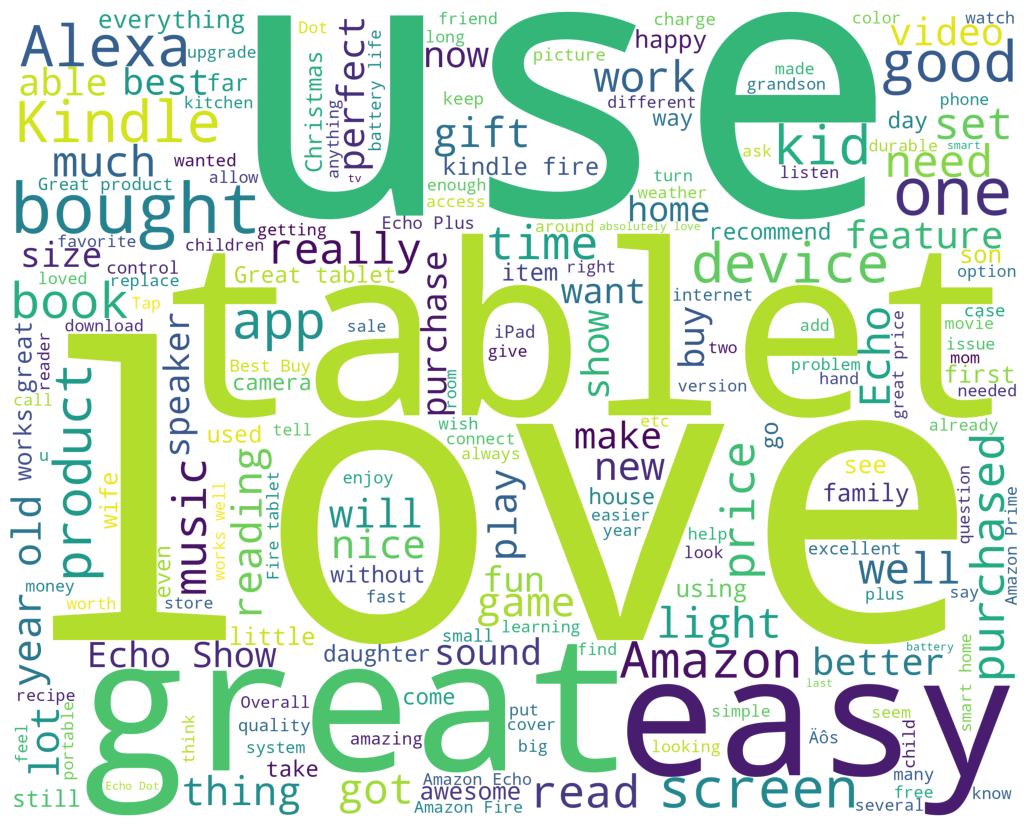

Negative words


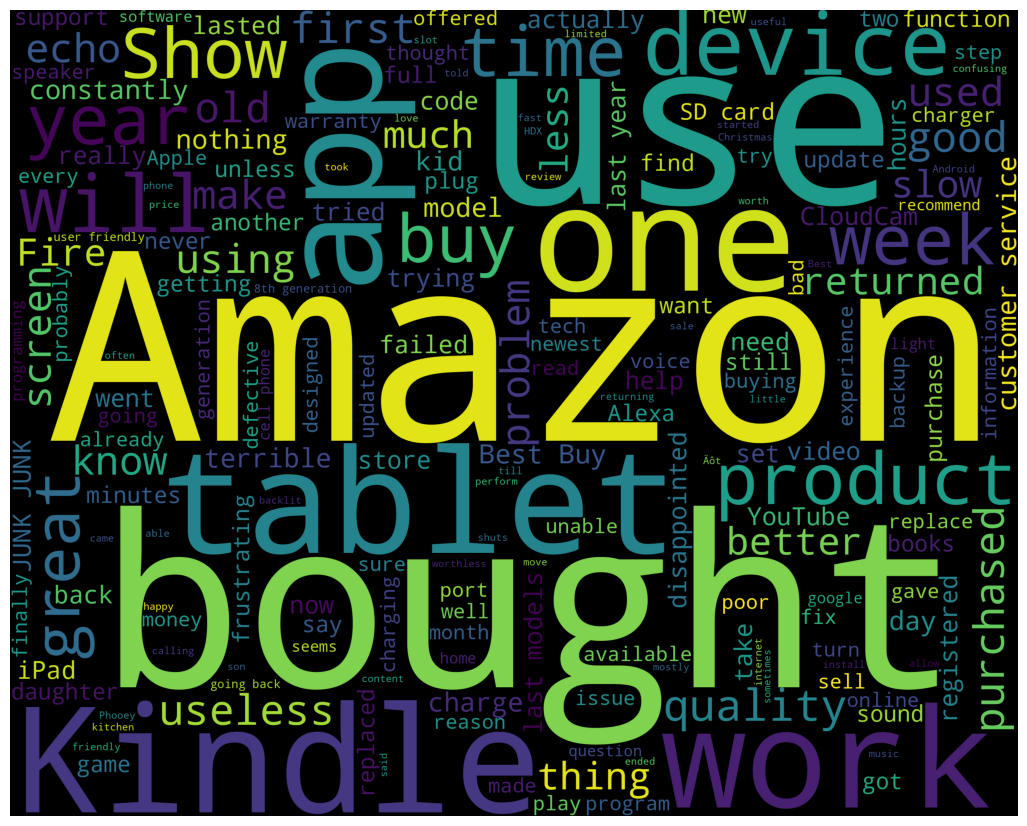

In [ ]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['reviews_text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['reviews_text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top Bigrams:
             bigram  count
0          easy use    267
1          year old    178
2         echo show    140
3       works great    117
4       kindle fire    109
5      great tablet    101
6          easy set     98
7         echo plus     92
8     great product     87
9          best buy     82
10     battery life     75
11      great price     69
12       works well     65
13      amazon echo     63
14  would recommend     62
15      amazon fire     59
16       smart home     54
17        kids love     52
18     amazon prime     52
19      fire tablet     51


<ipython-input-24-ab7319769c25>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='bigram', x='count', data=bigram_df, palette='viridis')


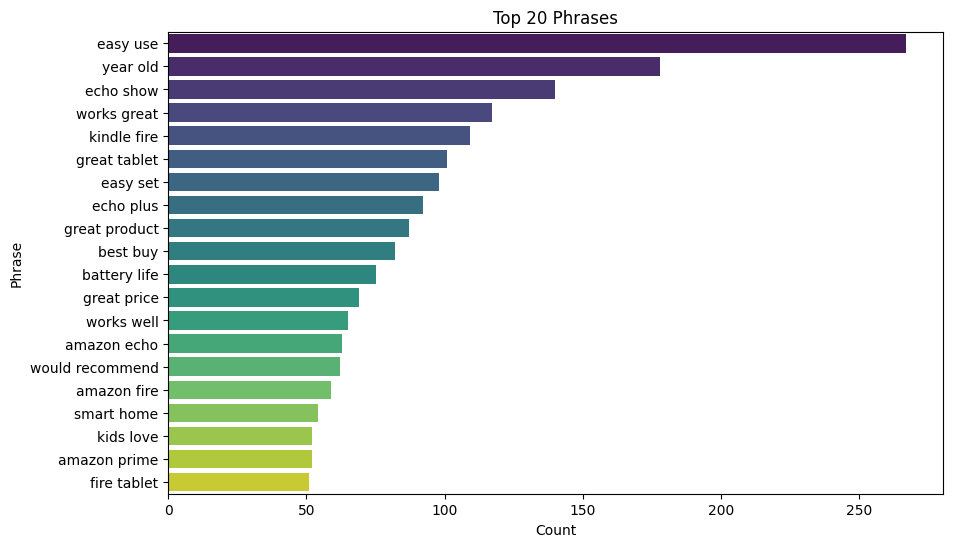

In [ ]:
from nltk.util import ngrams
from collections import Counter

import unicodedata

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


# Step 1: Fill NaN or None values with an empty string
train['reviews_text'] = train['reviews_text'].fillna('').astype(str)

# Step 2: Preprocess the text (normalization)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Normalize and preprocess text."""
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')  # Remove non-ASCII
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]  # Remove stopwords and short words
    return tokens

train['processed_text'] = train['reviews_text'].apply(preprocess_text)

# Step 3: Generate n-grams (bigrams or trigrams)
def generate_ngrams(tokens, n=2):
    """Generate n-grams from a list of tokens."""
    return list(ngrams(tokens, n))

train['bigrams'] = train['processed_text'].apply(lambda x: generate_ngrams(x, n=2))

# Step 4: Flatten bigrams into a single list
all_bigrams = [bigram for bigrams in train['bigrams'] for bigram in bigrams]

# Step 5: Count the most common bigrams
bigram_counts = Counter(all_bigrams)
top_bigrams = bigram_counts.most_common(20)

# Convert top bigrams into a DataFrame
bigram_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))  # Convert tuple to string

# Debugging: Print top bigrams
print("Top Bigrams:")
print(bigram_df)

# Step 6: Plot the top bigrams
plt.figure(figsize=(10, 6))
sns.barplot(y='bigram', x='count', data=bigram_df, palette='viridis')
plt.title('Top 20 Phrases')
plt.xlabel('Count')
plt.ylabel('Phrase')
plt.show()


Top Bigrams:
                 bigram  count
0              ive ever      2
1      product terrible      1
2        terrible broke      1
3          broke within      1
4           within week      1
5   absolutely horrible      1
6   horrible experience      1
7      experience never      1
8             never buy      1
9         quality awful      1
10          awful worth      1
11          worth price      1
12  disappointed doesnt      1
13          doesnt work      1
14      work advertised      1
15       complete waste      1
16          waste money      1
17         money regret      1
18        regret buying      1
19         hate product      1


<ipython-input-25-26f6d7c7a615>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='bigram', x='count', data=bigram_df, palette='viridis')


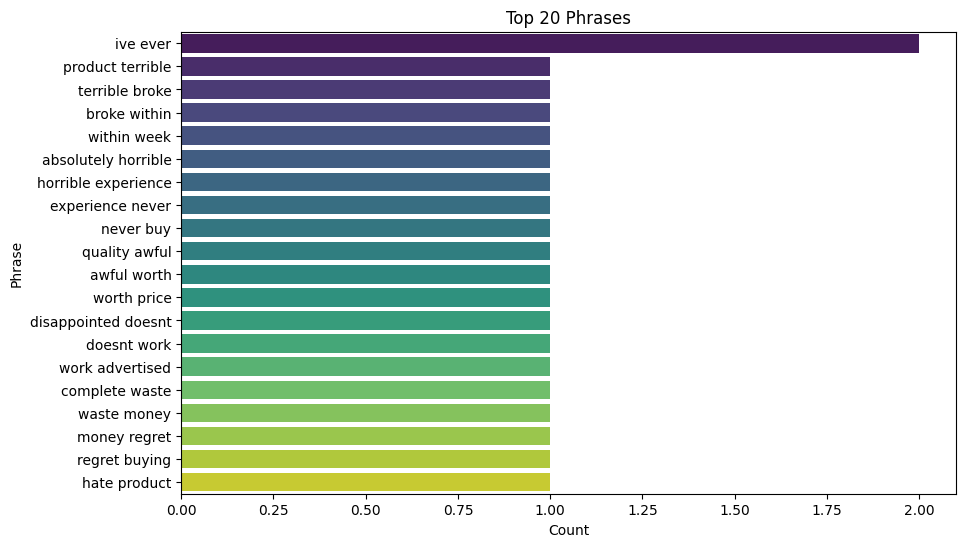

In [ ]:
data = {
    "reviews_text": [
        "This product is terrible. It broke within a week!",
        "Absolutely horrible experience. Will never buy again.",
        "The quality is awful. Not worth the price at all.",
        "Very disappointed. It doesn’t work as advertised.",
        "Complete waste of money. I regret buying this.",
        "I hate this product. Worst purchase ever!",
        "Not satisfied. The material feels cheap and flimsy.",
        "Terrible customer service. They don’t care about their customers.",
        "I am very unhappy with this product. It's useless.",
        "This is the most frustrating thing I’ve ever used.",
        "It arrived broken and support refused to help.",
        "False advertising! It doesn’t do what they claim.",
        "This is a scam. Do not fall for it.",
        "The packaging was damaged, and the item didn’t work.",
        "Horrible! I expected much better for this price.",
        "Extremely disappointed. Would give zero stars if I could.",
        "It's the worst experience I’ve ever had with a product.",
        "Not as described. Totally misleading!",
        "It’s cheaply made and broke on the first day.",
        "Pathetic quality. I want my money back!"
    ]
}


train2 = pd.DataFrame(data)
train2['processed_text'] = train2['reviews_text'].apply(preprocess_text)

train2['bigrams'] = train2['processed_text'].apply(lambda x: generate_ngrams(x, n=2))

# Step 4: Flatten bigrams into a single list
all_bigrams = [bigram for bigrams in train2['bigrams'] for bigram in bigrams]

# Step 5: Count the most common bigrams
bigram_counts = Counter(all_bigrams)
top_bigrams = bigram_counts.most_common(20)

# Convert top bigrams into a DataFrame
bigram_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))  # Convert tuple to string

# Debugging: Print top bigrams
print("Top Bigrams:")
print(bigram_df)

# Step 6: Plot the top bigrams
plt.figure(figsize=(10, 6))
sns.barplot(y='bigram', x='count', data=bigram_df, palette='viridis')
plt.title('Top 20 Phrases')
plt.xlabel('Count')
plt.ylabel('Phrase')
plt.show()
